<a href="https://colab.research.google.com/github/gopikumar936/Automated-Image-Captioning/blob/master/Eazydiner_Tech_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno


In [3]:
signup_data = pd.read_excel("/content/drive/MyDrive/dataset1/Sample_CUSTOMER_Dataset_2.xlsx")
booking_data = pd.read_excel("/content/drive/MyDrive/dataset1/Sample_BOOKINGS_Dataset_1.xlsx")

In [4]:
booking_data.head()

,date,medium,restaurant_name,location,cust_id
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123


In [5]:
signup_data.head()

,cust_id,name,city,gender,AGE,medium,signup_date
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01
2,5015431352114,mani,Chennai,M,29,android,2020-09-01
3,5015431352115,Rija,Kolkata,F,60,google,2020-09-01
4,5015431352120,Bharath,NaN,M,32,google,2020-09-01


In [6]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61333 entries, 0 to 61332
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61333 non-null  datetime64[ns]
 1   medium           61333 non-null  object        
 2   restaurant_name  61333 non-null  object        
 3   location         61333 non-null  object        
 4   cust_id          61333 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
signup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98354 entries, 0 to 98353
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cust_id      98354 non-null  int64         
 1   name         92756 non-null  object        
 2   city         80621 non-null  object        
 3   gender       4700 non-null   object        
 4   AGE          98354 non-null  int64         
 5   medium       98354 non-null  object        
 6   signup_date  98354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.3+ MB


In [8]:
#Merging Both the dataset into one dataframe on cust_id column using outer join 
Merged_data = pd.merge(left=booking_data, right=signup_data, how='outer', left_on='cust_id', right_on='cust_id')

In [9]:
Merged_data.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,F,27,google,2020-09-01
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,2020-09-01
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,M,38,google,2020-09-01


In [10]:
Merged_data.shape

(98354, 11)

In [11]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98354 entries, 0 to 98353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61333 non-null  datetime64[ns]
 1   medium_x         61333 non-null  object        
 2   restaurant_name  61333 non-null  object        
 3   location         61333 non-null  object        
 4   cust_id          98354 non-null  int64         
 5   name             92756 non-null  object        
 6   city             80621 non-null  object        
 7   gender           4700 non-null   object        
 8   AGE              98354 non-null  int64         
 9   medium_y         98354 non-null  object        
 10  signup_date      98354 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.0+ MB


In [12]:
#Checking Missing Value
print(Merged_data.isnull().any())
print("Count of Missing Value in each columns/feature")
print(Merged_data.isnull().sum())

date                True
medium_x            True
restaurant_name     True
location            True
cust_id            False
name                True
city                True
gender              True
AGE                False
medium_y           False
signup_date        False
dtype: bool
Count of Missing Value in each columns/feature
date               37021
medium_x           37021
restaurant_name    37021
location           37021
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
dtype: int64


In [13]:
#Eliminating duplicate rows after merging
Merged_data[Merged_data.duplicated(keep = 'first' , subset = ['cust_id'])]

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date


In [14]:
Merged_data.sort_values(by=['cust_id'], inplace=True)
Merged_data.reset_index(drop=True, inplace=True)

In [15]:
Merged_data.isnull().sum()

date               37021
medium_x           37021
restaurant_name    37021
location           37021
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
dtype: int64

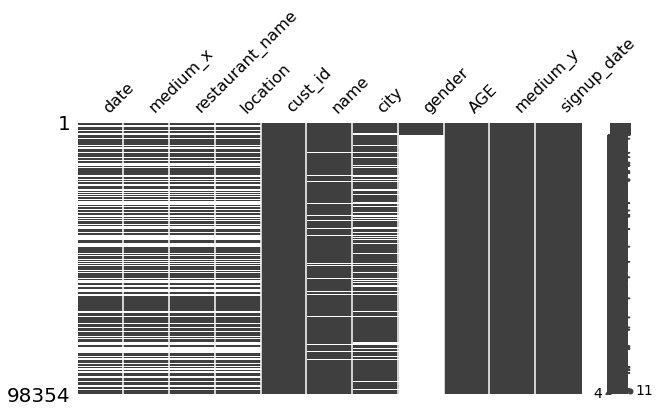

In [16]:
missingno.matrix(Merged_data,figsize=(10,5))

#    Observations 
 1) There are missing values in columns except cust_id,AGE,medium_y and signup_date

2) Number of Missing value in column Gender is very high . so We will drop this column

3)The columns medium_x and medium_y are same for a particular customer, but some values are missing in medium_x so we can replace those missing values with the values in medium_y. 

In [17]:
Merged_data1 = Merged_data.copy()

In [19]:
Merged_data1.drop("gender",axis=1 , inplace=True)

In [20]:
Merged_data1.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,AGE,medium_y,signup_date
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,72,web,2020-09-01
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,45,android,2020-09-01
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,29,android,2020-09-01
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,60,google,2020-09-01
4,NaT,NaN,NaN,NaN,5015431352120,Bharath,NaN,32,google,2020-09-01


In [21]:
#Creating a new column medium which contains all the values in medium_x after filling missing values
Merged_data['medium']= Merged_data['medium_x'].fillna(Merged_data['medium_y'])

In [22]:
##Creating new_column "Duration" denotes difference in booking_date and signup_date 
from datetime import timedelta
Merged_data['Duration'] = Merged_data['date']-Merged_data['signup_date']
Merged_data['Duration'] = Merged_data['Duration']/timedelta(days=1)

Based on the 'Duration' column we will create a new column 'Booked_status' which will denote whether a customer has done the booking within 7 days of signing up or not

In [23]:
# 0 - customers who have not booked after signup or those who have not booked within 7 days
# 1 - customers who have booked within 7 days 
Merged_data['Booked_status']= np.where(Merged_data['Duration']>7,0, np.where(Merged_data['Duration'].isnull(), 0, 1))

In [24]:
Merged_data.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,Duration,Booked_status
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3.0,1
1,NaT,NaN,NaN,NaN,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,NaN,0
2,NaT,NaN,NaN,NaN,5015431352114,mani,Chennai,M,29,android,2020-09-01,android,NaN,0
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,google,5.0,1
4,NaT,NaN,NaN,NaN,5015431352120,Bharath,NaN,M,32,google,2020-09-01,google,NaN,0


In [25]:
Merged_data.isnull().sum()

date               37021
medium_x           37021
restaurant_name    37021
location           37021
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
medium                 0
Duration           37021
Booked_status          0
dtype: int64

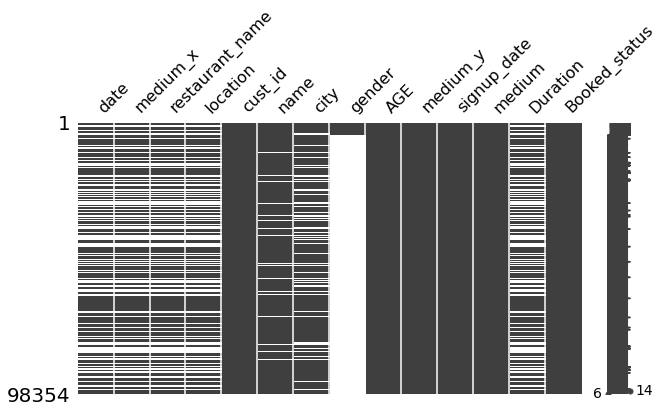

In [26]:
missingno.matrix(Merged_data,figsize=(10,5))

1) We can see that the number of missing values in all the 3 columns 'restaurant_name', 'location' and 'duration' are same which makes sense because there are missing values in the 'duration' column for those customers who have not done booking after signing up and hence the restaurant_name and location will also be not there in the records for such customers and hence the value under column 'Booked' will be 0 for all of them.

2) So we can infer that these missing values are directly related to the 'Booked' column. So we need to take care of these missing values as we cannot directly drop them.

3) We can fill any number greater that 7 in 'Duration' column to replace null value so that 'booked_status' value is maintained at 0.

In [27]:
#Replacing null values with 8 in 'duration'.
Merged_data['Duration'] = Merged_data['Duration'].fillna(8).astype(int)

In [28]:
#Replacing null values in 'restaurant_name' with a new category 'restaurant_name_null'.
Merged_data['restaurant_name'] = Merged_data['restaurant_name'].fillna('restaurant_name_null')

In [29]:
#Replacing null values in 'location' with a new category 'location_null'.
Merged_data['location'] = Merged_data['location'].fillna('location_null')

In [30]:
##Replacing null values in 'city' with a new category 'city_null'.
Merged_data['city'] = Merged_data['city'].fillna('city_null')

In [31]:
Merged_data.isnull().sum()

date               37021
medium_x           37021
restaurant_name        0
location               0
cust_id                0
name                5598
city                   0
gender             93654
AGE                    0
medium_y               0
signup_date            0
medium                 0
Duration               0
Booked_status          0
dtype: int64

In [32]:
#Total number of Bookings done
Merged_data['Booked_status'].value_counts()

1    54688
0    43666
Name: Booked_status, dtype: int64

# Handling Categorical Feature Columns

In [33]:
# Relavant Columns - 'location' , 'restaurant_name' ,'city' , 'medium'

cols = ['restaurant_name','location','city','medium']
for i in Merged_data[cols]:
    print('Number of unique values in {} : {}'.format(i, len(Merged_data[i].unique())))

Number of unique values in restaurant_name : 2314
Number of unique values in location : 1232
Number of unique values in city : 168
Number of unique values in medium : 6


We can see that number of unique categories in column 'restaurant_name ' , 'location' ,'city' is very high and hence after encoding the number of columns will increase by a large amount . So, We cannot directly encode these features.





To prevent this we will encode the top 50 frequent categories in each column which will decrease our number of columns 

In [35]:
#Top 50 categories of restaurant_names
restaurant_list=Merged_data.restaurant_name.value_counts().sort_values(ascending=False).head(50).index
restaurant_list=list(restaurant_list)
print(restaurant_list)

['restaurant_name_null', 'Barbeque Nation', "AB's - Absolute Barbecues", 'Byg Brewski Brewing Company', 'Mainland China', 'Runway1', "The Fisherman's Wharf", 'Flame & Grill', 'Barbeque nation', 'Sigree Global Grill', 'The G.T. Road', 'Uru Brewpark', 'Olive Bistro', '6 Ballygunge Place', 'BOA VILLAGE', 'JW Kitchen', 'Punjab Grill', 'Claw BBQ Crabshack & Grill', 'Farzi Cafe', 'Lord of the Drinks', 'Olive Bar & Kitchen', 'Oh! Calcutta', 'DRAMZ', 'The Big Barbeque', 'Bukhara', 'The Marketplace', "Chili's", 'Diablo', 'Jetlag', 'Brahma Brews', 'The Barbeque Company', 'Cafe Delhi Heights', 'Sigree', 'Gufha', 'The Caravan Menu', 'Little Italy', 'Communiti', ' Golconda Pavilion', 'Unplugged Courtyard', '27 Culinary Street', 'Jungle Jamboree', 'Arbor Brewing Company', 'Little Italy ', 'Local', 'Sector 7 Social', 'Kipling Cafe', "Berco's", 'The Tenth Floor', 'La Cabana', 'MKT']


In [37]:
#encoding the column 'restaurant_name'
for categories in restaurant_list:
    Merged_data['R' + '_' + categories]=np.where(Merged_data['restaurant_name']==categories,1,0)

In [38]:
#Splitting the features and label column
cols = ['date','medium_x','restaurant_name','location','cust_id','city','name','gender','medium_y','signup_date','Booked_status','medium']
X = Merged_final.drop(Merged_data[cols],axis=1) ## Removing Redundant features - as we have create new columns corresponding to these columns 
y = Merged_final['Booked_status']

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,medium,Duration,Booked_status,R_restaurant_name_null,R_Barbeque Nation,R_AB's - Absolute Barbecues,R_Byg Brewski Brewing Company,R_Mainland China,R_Runway1,R_The Fisherman's Wharf,R_Flame & Grill,R_Barbeque nation,R_Sigree Global Grill,R_The G.T. Road,R_Uru Brewpark,R_Olive Bistro,R_6 Ballygunge Place,R_BOA VILLAGE,R_JW Kitchen,R_Punjab Grill,R_Claw BBQ Crabshack & Grill,R_Farzi Cafe,R_Lord of the Drinks,R_Olive Bar & Kitchen,R_Oh! Calcutta,R_DRAMZ,R_The Big Barbeque,R_Bukhara,R_The Marketplace,R_Chili's,R_Diablo,R_Jetlag,R_Brahma Brews,R_The Barbeque Company,R_Cafe Delhi Heights,R_Sigree,R_Gufha,R_The Caravan Menu,R_Little Italy,R_Communiti,R_ Golconda Pavilion,R_Unplugged Courtyard,R_27 Culinary Street,R_Jungle Jamboree,R_Arbor Brewing Company,R_Little Italy,R_Local,R_Sector 7 Social,R_Kipling Cafe,R_Berco's,R_The Tenth Floor,R_La Cabana,R_MKT
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,web,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaT,NaN,restaurant_name_null,location_null,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01,android,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaT,NaN,restaurant_name_null,location_null,5015431352114,mani,Chennai,M,29,android,2020-09-01,android,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,google,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaT,NaN,restaurant_name_null,location_null,5015431352120,Bharath,city_null,M,32,google,2020-09-01,google,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
#Top 50 categories of location
location_list=Merged_data.location.value_counts().sort_values(ascending=False).head(50).index
location_list=list(location_list)
print(location_list)

['location_null', 'Connaught Place (CP), Central Delhi', 'Banjara Hills, Hyderabad', 'Patna', 'JP Nagar, South Bengaluru', 'Visakhapatnam', 'Indiranagar, East Bengaluru', 'Jubilee Hills, Hyderabad', 'Rajajinagar, West Bengaluru', 'Hennur, North Bengaluru', 'Mehrauli, South Delhi', 'Sector 26, Chandigarh', 'Guwahati', 'Vijayawada', 'Koramangala, South Bengaluru', 'Sarjapur Road, South Bengaluru', 'Durgapur', 'Tirupati', 'Bhubaneswar', 'Coimbatore', 'Metro Walk Mall, Rohini', 'Trichy', 'Park Street Area, Kolkata', 'Kalyan Nagar, North Bengaluru', 'Gachibowli, Hyderabad', 'Nungambakkam, Chennai', 'Janakpuri, West Delhi', 'Madurai', 'Electronic City, South Bengaluru', 'Saket, South Delhi', 'Varanasi', 'Mysore', 'BTM, South Bengaluru', 'Velachery, Chennai', 'Inorbit Mall, Hitech City', 'T. Nagar, Chennai', 'Kothapet, Hyderabad', 'Ballygunge, Kolkata', 'Forum Sujana Mall, Kukatpally', 'Marathahalli, East Bengaluru', 'South City Mall, Prince Anwar Shah Road', 'Wakad, Pune', 'Ranchi', 'Sector 

In [40]:
#encoding the column 'location'
for category in location_list:
    Merged_data['L' + '_' + category]=np.where(Merged_data['location']==category,1,0)

In [41]:
#Top 50 categories of city
city_list=Merged_data.city.value_counts().sort_values(ascending=False).head(50).index
city_list=list(city_list)
print(city_list)

['city_null', 'Delhi NCR', 'Bengaluru', 'Hyderabad', 'Mumbai', 'Kolkata', 'Chennai', 'Pune', 'Chandigarh', 'Dubai', 'Patna', 'Goa', 'Jaipur', 'Visakhapatnam', 'Ahmedabad', 'Lucknow', 'Guwahati', 'Vijayawada', 'Durgapur', 'Tirupati', 'Bhubaneswar', 'Coimbatore', 'Trichy', 'Ludhiana', 'Madurai', 'Varanasi', 'Mysore', 'Kanpur', 'Ranchi', 'Kochi', 'Salem', 'Vadodara', 'Kakinada', 'Thiruvananthapuram', 'Erode', 'Pondicherry', 'Guntur', 'Surat', 'Amritsar', 'Bareilly', 'Mangalore', 'Nagpur', 'Nellore', 'Jalandhar', 'Agra', 'Dehradun', 'Vellore', 'Jammu', 'Prayagraj', 'Kolhapur']


In [43]:
#encoding the column 'city'
for city in city_list:
    Merged_data['C' + '_' + city]=np.where(Merged_data['city']==city,1,0)

In [45]:
#encoding the column 'medium'
df = pd.get_dummies(Merged_data['medium'],drop_first=True) 

In [46]:
df.head()

,api_partner,concierge,google,ios,web
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [47]:
#Final Dataframe after encoding
Merged_final = pd.concat([df,Merged_data],axis=1)

In [48]:
Merged_final.shape

(98354, 169)

In [51]:
#Splitting the features and label column
cols = ['date','medium_x','restaurant_name','location','cust_id','city','name','gender','medium_y','signup_date','Booked_status','medium']
X = Merged_final.drop(Merged_data[cols],axis=1) ## Removing Redundant features - as we have create new columns corresponding to these columns 
y = Merged_final['Booked_status']

In [52]:
X.head(),X.shape

(   api_partner  concierge  google  ...  C_Jammu  C_Prayagraj  C_Kolhapur
 0            0          0       0  ...        0            0           0
 1            0          0       0  ...        0            0           0
 2            0          0       0  ...        0            0           0
 3            0          0       1  ...        0            0           0
 4            0          0       1  ...        0            0           0
 
 [5 rows x 157 columns], (98354, 157))

In [53]:
y.head(3),y.shape

(0    1
 1    0
 2    0
 Name: Booked_status, dtype: int64, (98354,))

In [54]:
#splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)

# Applying Classification Algorithms 

According to the problem statement , we need to put those customers in the bucket of 1 whose probability is greater than or equal to 20%, so we will set up a threshold of 0.2 on our predicted probabilities and classify accordingly.



# Logistics Regression 

In [97]:
#Deploying Logistics Regression Classifier on the training data

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
prob_preds = clf.predict_proba(X_test)
threshold = 0.2
y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]
#Creating a confusion matrix and printing the accuracy score 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy from Logistics Regression ')
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))


[[13051     0]
 [    0 16456]]
Accuracy from Logistics Regression 
Accuracy : 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:
threshold = 0.2
accuracy = []
C = [0.5 ,0.8, 1.0, 1.2 , 1.5 ,1.8]
def LogisticRegressionClf():
  for c in C:
    clf = LogisticRegression(C=c)
    clf.fit(X_train,y_train)
    prob_preds = clf.predict_proba(X_test)
    y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]
    print('C : {}'.format(c))
    accuracy.append(accuracy_score(y_test, y_pred))
   



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
LogisticRegressionClf()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C : 0.5
Accuracy : 1.0
-------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C : 0.8
Accuracy : 0.9998644389466906
-------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C : 1.0
Accuracy : 1.0
-------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C : 1.2
Accuracy : 1.0
-------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C : 1.5
Accuracy : 1.0
-------------------------
C : 1.8
Accuracy : 1.0
-------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [79]:
# prob_preds = clf.predict_proba(X_test)
# threshold = 0.2
# y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]

In [ ]:
# #Creating a confusion matrix and printing the accuracy score 
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# cm = confusion_matrix(y_test, y_pred)
# # print(cm)
# print('Accuracy from Logistics Regression ')
# print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

Text(0.5, 257.44, 'Predicted label')

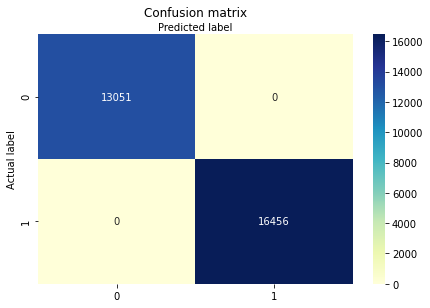

In [98]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Decision Tree Classifier 

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [113]:
prob_preds = dt_clf.predict_proba(X_test)
threshold = 0.2
y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]

In [114]:
#Creating a confusion matrix and printing the accuracy score 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

[[13051     0]
 [    0 16456]]
Accuracy : 1.0


# Random Forest Classification 

In [118]:
#Deploying Random Forest Classifier on the training data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [119]:
prob_preds = classifier.predict_proba(X_test)
threshold = 0.2
y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]

In [120]:
#Creating a confusion matrix and printing the accuracy score 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))


[[13038    13]
 [    0 16456]]
Accuracy : 0.9995594265767445


#XG Boost Classifier 

In [108]:
from xgboost import XGBClassifier

# fit model no training data
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [110]:
prob_preds = xgb_clf.predict_proba(X_test)
threshold = 0.2
y_pred = [1 if prob_preds[i][1]>= threshold else 0 for i in range(len(prob_preds))]

In [111]:
#Creating a confusion matrix and printing the accuracy score 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

[[13051     0]
 [    0 16456]]
Accuracy : 1.0


# Conclusion


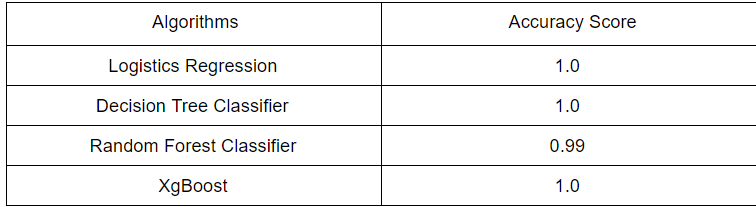




